#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Name: Jakub Domański
- Name: Mehmet Emre Durmus
- Name: Jakub Kwaśniak

Import modules and anything else you need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import seaborn as sns

## Deterministic methods of numerical integration

### Simple quadrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by: $$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`) $$0.1894723458204922$$ and $$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [2]:
def f(x: float) -> float:
    """Definition of f(x)."""
    return x * x * np.exp(-x*x)

def abs_error(numerical_value: float, actual_value: float) -> float:
    """"Function returning the absolute value of the difference between two values."""
    return abs(actual_value - numerical_value)

Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

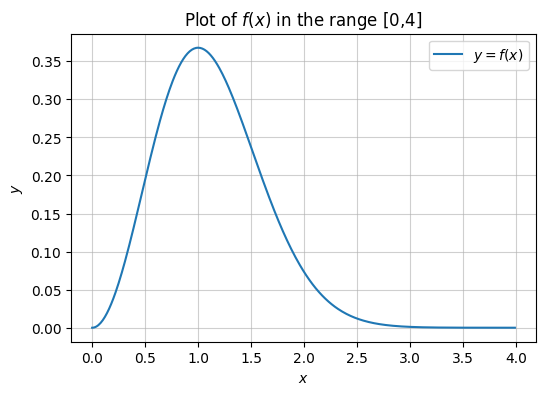

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
x = np.arange(0, 4, 0.01)
plt.title(r"Plot of $f(x)$ in the range [0,4]")
plt.plot(x, f(x), label=r"$y=f(x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.legend()
plt.grid(alpha=0.6)
plt.show()

Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [8]:
def riemann_point(a: float, b: float, n: int, arg: str, func) -> float:
    """Function implementing the left, middle, and right rules variations of the Riemann sum method of integration.

    Params:
    a (float): left bound of the integral
    b (float): right bound of the integral
    n (int): number of sub-intervals
    arg (str): name of the Riemann rule: left, right, middle
    func: function of which the integral is to be evaluated
    
    Returns:
    I (float): numerical value of the integral
    """

    # Init value of the integral
    I = 0
      
    # Calculate the size of the sub-intervals
    h = (b-a)/n

    # Calculate the array of x-values for evaluation of the function
    x = np.array([])
    for i in range(0, n+1): x = np.append(x, a+i*h)

    # Left-rule
    try:
        if arg == "left":
            for i in range(1, n+1): I += h * func(x[i-1])
        elif arg == "middle":
            for i in range(1, n+1): I += h * func((x[i-1] + x[i])/2)
        elif arg == "right":
            for i in range(1, n+1): I += h * func(x[i])
    except: return "Incorrect function parameter..."
    
    return I

# Easy function with an analytical straightforward analytical integral
# -> We expect the result to be x^3/3|_{a}^{b} 
g = lambda x: x*x 

# Boundaries for integration
a = 0
b = 4

# Number of subintervals
n = 100

# Name of the rule to implement
arg = "middle"

print(f"[{arg}] The integral of g(x) in the range [{a}, {b}] = {riemann_point(a, b, n, arg, g)}, n={n}")

[middle] The integral of g(x) in the range [0, 4] = 21.332800000000002, n=100


In [9]:
def riemann_trapezoidal(a: float, b: float, n: int, func) -> float:
    """Function implementing the trapezoidal rule variations of the Riemann sum method of integration.

    Params:
    a (float): left bound of the integral
    b (float): right bound of the integral
    n (int): number of sub-intervals
    func: function of which the integral is to be evaluated
    
    Returns:
    I (float): numerical value of the integral
    """
    # Extract left Riemann sum
    s_l = riemann_point(a, b, n , "left", func)
    # Extract right Riemann sum
    s_r = riemann_point(a, b, n, "right", func)

    I = 1/2*(s_l + s_r)
    return I
    
print(f"[Trapezoidal] The integral of g(x) in the range [{a}, {b}] = {riemann_trapezoidal(a, b, n, g)}, n={n}")

[Trapezoidal] The integral of g(x) in the range [0, 4] = 21.33440000000001, n=100


In [11]:
def simpson(a: float, b: float, n: int, func):
    """Function implementing Simpson's rule of numerical integration. 

    Params:
    a (float): left bound of the integral
    b (float): right bound of the integral
    n (int): number of sub-intervals
    func: function of which the integral is to be evaluated

    Returns:
    I (float): numerical value of the integral"""

    I = 1/3 * (2 * riemann_point(a, b, n, "middle", func) + riemann_trapezoidal(a, b, n, func))

    return I

print(f"[Simpson] The integral of g(x) in the range [{a}, {b}] = {simpson(a, b, n, g)}, n={n}")

[Simpson] The integral of g(x) in the range [0, 4] = 21.333333333333336, n=100


For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [12]:
# Define interval parameters 
a1, b1 = 0, 1
a2, b2 = 0, 3
n = 100

# Actual values of the integrals
int_1 = 0.1894723458204922 # [0,1]
int_2 = 0.4429185594236305 # [0,3]

# Calculate the integrals using different rules
for rule in ["left", "middle", "right"]:
    print(f"{rule}: [{a1}, {b1}]: {abs_error(riemann_point(a1, b1, n, rule, f), int_1)}, [{a2}, {b2}]: {abs_error(riemann_point(a2, b2, n, rule, f), int_2)}")

print(f"trapezoidal: [{a1}, {b1}]: {abs_error(riemann_trapezoidal(a1, b1, n, f), int_1)}, [{a2}, {b2}]: {abs_error(riemann_trapezoidal(a2, b2, n, f), int_2)}")
print(f"Simpson: [{a1}, {b1}]: {abs_error(simpson(a1, b1, n, f), int_1)}, [{a2}, {b2}]: {abs_error(simpson(a2, b2, n, f), int_2)}")

left: [0, 1]: 0.0018393972262961689, [0, 3]: 1.7104453936434005e-05
middle: [0, 1]: 1.7884471681384184e-11, [0, 3]: 2.2201085420059385e-07
right: [0, 1]: 0.0018393971854182567, [0, 3]: 1.621619316699574e-05
trapezoidal: [0, 1]: 2.043895608316859e-11, [0, 3]: 4.4413038474688804e-07
Simpson: [0, 1]: 5.109968004290977e-12, [0, 3]: 3.622546707049423e-11


Based on the results of absolute errors obtained in the previous cell, we may conclude that Simpson's rule is the most accurate rule both in the $[0, 1]$ and $[0, 3]$ intervals, followed by the trapezoidal rule. This is consistent with out intuition, since Simpson's rule takes into account the combination of midpoint and trapezoidal rules, both quite accurate, returning an even more accurate result. From the comparison of left, middle, and right-point rules, we might conclude that the mid-point rule is the most accurate, since the left and right-point rules tend to underestimate and overestimate the values of the integral, respectively.

While the general Simpson's rule seems to perform well in the first interval it is the worst in the second interval, this is due to the fact that this rule is only applicable for polynomials up to a degree of 3 (source: https://en.wikipedia.org/wiki/Simpson%27s_rule) and indeed in the first interval the function can be approximated by its Taylor series, i.e. a polynomial. The left and right rules don't perform well in general due to the number of points, if we are to increase the number of points we see that their error also converges to 0 quickly.

We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

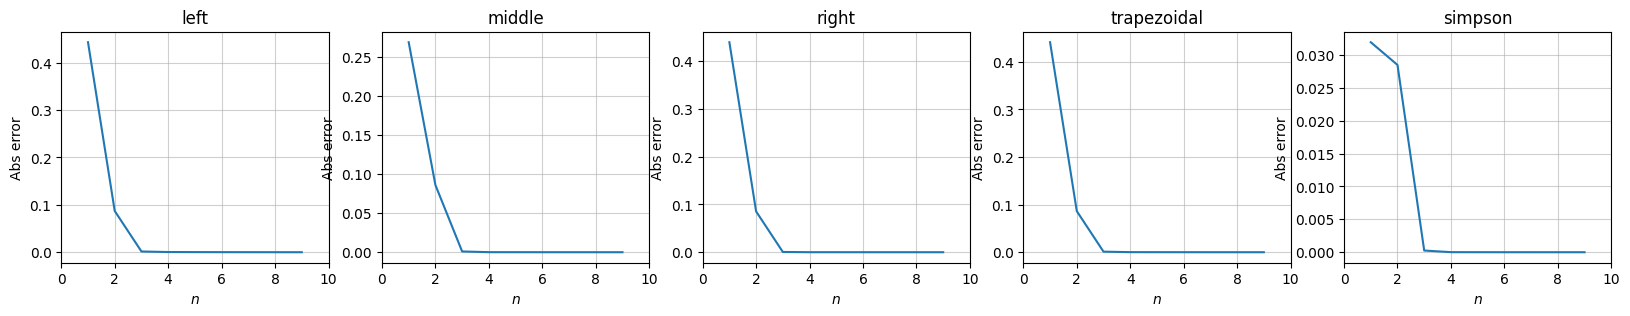

In [13]:
rules = ["left", "middle", "right", "trapezoidal", "simpson"]

n = np.arange(1, 10, 1)
    

err_left, err_mid, err_right, err_trap, err_sim = (np.array([]) for i in range(5))

for i in n:
    err_left = np.append(err_left, abs_error(riemann_point(0, 3, i, "left", f), int_2))
    err_mid = np.append(err_mid, abs_error(riemann_point(0, 3, i, "middle", f), int_2))
    err_right = np.append(err_right, abs_error(riemann_point(0, 3, i, "right", f), int_2))
    err_trap = np.append(err_trap, abs_error(riemann_trapezoidal(0, 3, i, f), int_2))
    err_sim = np.append(err_sim, abs_error(simpson(0, 3, i, f), int_2))

errs = [err_left, err_mid, err_right, err_trap, err_sim]

fig, axes = plt.subplots(1, len(rules), figsize=(20, 3))

for i, ax in enumerate(axes):
        ax.set_xlabel("$n$")
        ax.grid(alpha = 0.6)
        ax.set_xlim(0, 10)
        ax.set_title(rules[i])
        ax.plot(n, errs[i])
        ax.set_ylabel("Abs error")

plt.show()

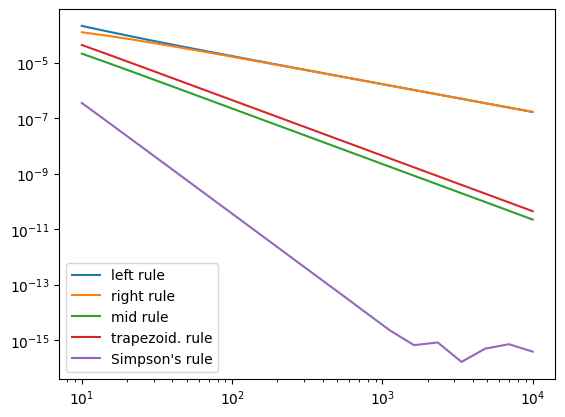

In [14]:
def riemann_left(a, b, n, f):
    return riemann_point(a, b, n, "left", f)

def riemann_right(a, b, n, f):
    return riemann_point(a, b, n, "right", f)

def riemann_mid(a, b, n, f):
    return riemann_point(a, b, n, "middle", f)

integral_functions = [riemann_left, riemann_right, riemann_mid, riemann_trapezoidal, simpson]

integral_names = {riemann_left : 'left rule', riemann_right : 'right rule', riemann_mid : 'mid rule', riemann_trapezoidal : 'trapezoid. rule', simpson : 'Simpson\'s rule'}

N = [int(x) for x in np.logspace(1, 4, 20)]

for integral in integral_functions:
    Err = [abs_error(integral(0, 3, n, f), int_2) for n in N]
    plt.plot(N, Err, label=integral_names[integral])

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

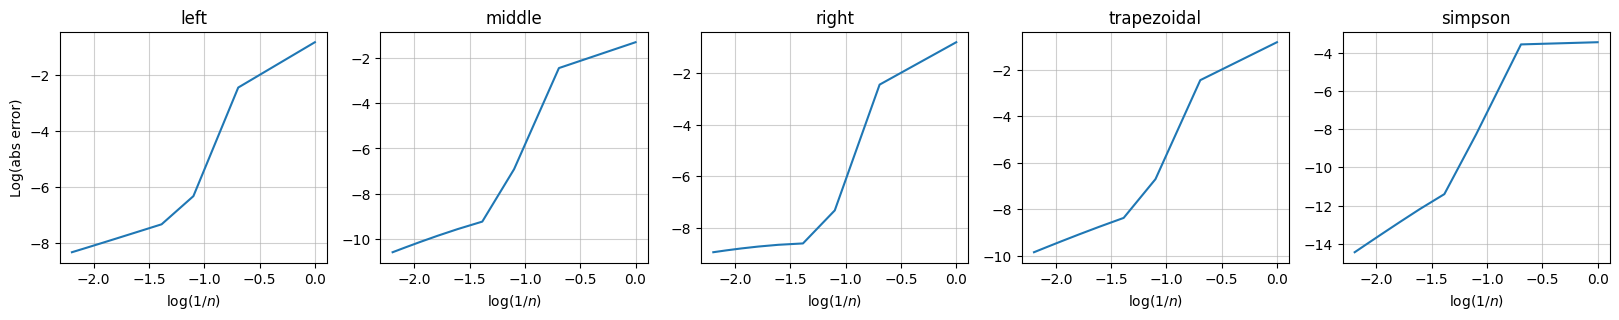

[3.656035554728421, 4.7088987781637455, 3.9939345908291917, 4.454008836817767, 5.771516033334276]


In [15]:
fig, axes = plt.subplots(1, len(rules), figsize=(20, 3))

alphas = []

for i, ax in enumerate(axes):
    ax.set_xlabel("$\log(1/n)$")
    ax.set_title(rules[i])
    ax.grid(alpha = 0.6)
    ax.plot(np.log(1/n), np.log(errs[i]))
    res = stats.linregress(np.log(1/n), np.log(errs[i]))
    alphas.append(res.slope)


axes[0].set_ylabel("Log(abs error)")
plt.show()
print(alphas)

From the above results we can observe that the values of alpha are the largest for: Simpson, Middle, Trapezoidal, Right, Left rules, respectively. This states that the error, which follows the $1/n^{\alpha}$ depedence is the smallest for these rules, in order. Naturally, the larger the value of alpha, the smaller the error for the same value of subintervals $n$. This result is consistent with what we found in the previous exercise, calculating the absolute error for a specific value of $n=100$.

## Improper integrals

Integrate the improper integral  for $x = 1$
$$ I = \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x'^2/2)} \; dx'  $$


We employ a bit of algebraic manipulations to recast the integral into a proper form to integrate in numerically.

$$ I = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x  \exp{(-x'^2/2)} \; dx'  = \frac{1}{\sqrt{2 \pi}}\left(\int_{-\infty}^{-1} \exp(-x'^2/2) \; dx' + \int_{-1}^1\exp(-x'^2/2) \; dx'\right)$$

let $t = 1/x' \rightarrow dx' = -1/t^2 dt$


$$ I = \frac{1}{\sqrt{2\pi}}\left(\int_{0}^{1}\frac{1}{t^2}\exp\left(-\frac{1}{2t^2}\right) \; dt + 2\int_{0}^{1} \exp\left(-\frac{x'^2}{2}\right) dx'\right),$$

where we took advantage of the integral being an even function of $x'$ over the interval $[-1, 1]$.

In [16]:
# Employ the midpoint rule, as it does not evaluate the integral precisely at 0, which is an asymptote of the function  

fx = lambda x: np.exp(-x*x/2)
ft = lambda t: 1/(t*t) * np.exp(-1/(2*t*t))

I = 1/np.sqrt(2 * np.pi) * (riemann_point(0, 1, 10, "middle", ft) + 2 * riemann_point(0, 1, 10, "middle", fx))
print(f"I = {I} evaluated using the midpoint rule")

I = 0.8416485009873369 evaluated using the midpoint rule


## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine 
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$ 
- study the dependence of the absolute error on the number of samples.

Define the function $f(x)$ and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

In [17]:
fx = lambda x: x*x

def montecarlo(f, a: float, b: float, n: int):
    """Function implementing a Monte Carlo integration routine to a function f with n random points

    Params:
    f: function to be integrated
    a: left boundary of the integration interval
    b: right boundary of the integration interval
    n: number of random points

    Returns
    I (float): value of the integral
    """
    
    return (b-a)*np.mean(f(np.random.uniform(a, b, n)))

Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

In [18]:
int_mc = montecarlo(fx, -2, 2, 10000)
int_sim = simpson(-2, 2, 1000, fx)
# Scipy
int_sc = integrate.quad(fx, -2, 2)

print(f"Monte Carlo: {int_mc}, abs error= {abs_error(int_mc, int_sc[0])}")
print(f"Simpson: {int_sim}, abs error = {abs_error(int_sim, int_sc[0])}")

Monte Carlo: 5.337608891301542, abs error= 0.00427555796820922
Simpson: 5.3333333333333295, abs error = 3.552713678800501e-15


In [19]:
%timeit montecarlo(fx, -2, 2, 100000)

2.91 ms ± 38.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit simpson(-2, 2, 1000, fx)

31 ms ± 495 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The Monte Carlo result seems to be less accurate than the one obtained using deterministic techniques, hence we need a large number of random points to reach the desired accuracy. Since the integral we are dealing with here is one-dimensional, this is an expected behaviour. It is much faster to employ, e.g. the Simpson's rule to evaluate the integral numerically. The Monte Carlo method is inherently probabilistic and hence has fluctuating values depending on the points that are sampled. However, if the precision in the result is not too important (at least up to 3 digits in this case) it can still be utilised to compute the value of the integral.

However, the Monte Carlo technique becomes much more convenient is when the number of dimensions is larger, e.g. above 4 or 5. In that case, since the error scales with the inverse square root of $N$ being the number of points, we obtain a smaller error than the one obtained with the other aforementioned techniques.

Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment. 

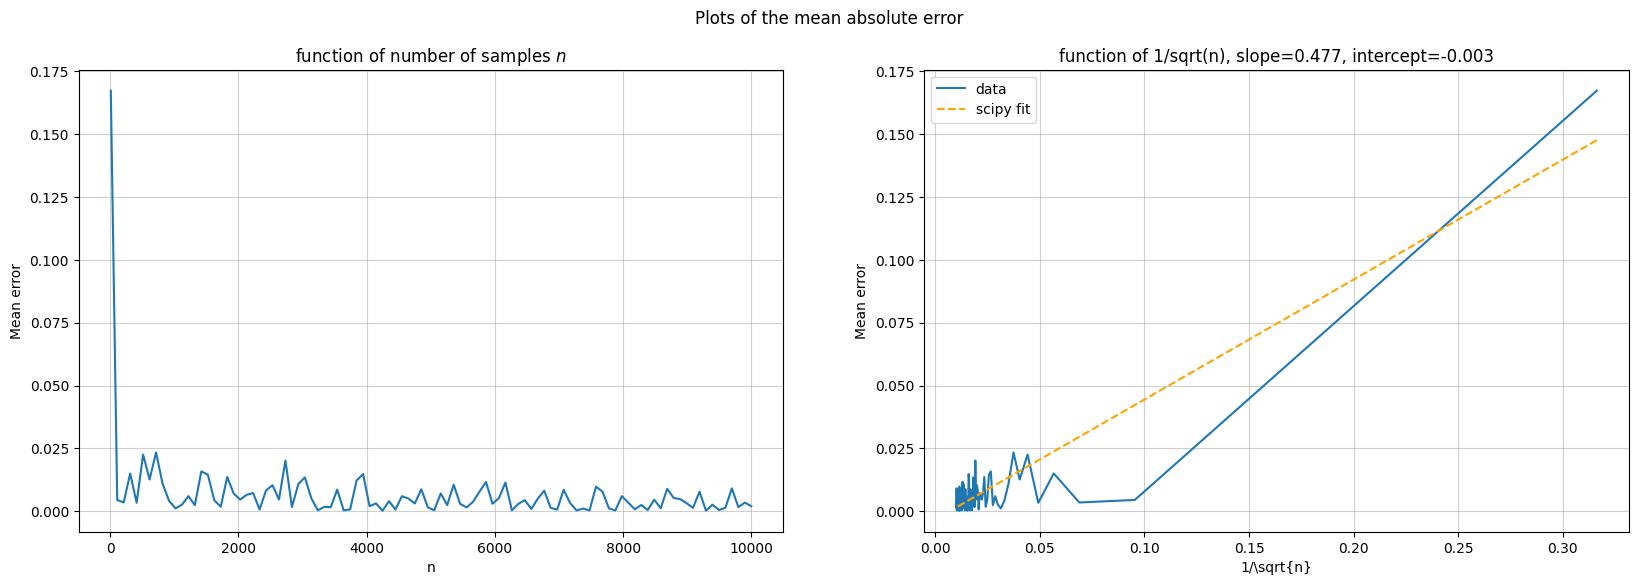

In [21]:
n = np.linspace(10, 10**4, 10**2, dtype=int)
N = 100
err = [abs_error(np.mean([montecarlo(fx, -2, 2, j) for i in range(N)]), int_sc[0]) for j in n]

fig, axes = plt.subplots(1, 2, figsize=(20,6))
plt.suptitle("Plots of the mean absolute error")

axes[0].plot(n, err)
axes[0].set_title(r"function of number of samples $n$")
axes[0].set_xlabel("n")
axes[0].set_ylabel("Mean error")
axes[0].grid(alpha = 0.6)

# Linear regression
res = stats.linregress(1/np.sqrt(n), err)

axes[1].plot(1/np.sqrt(n), err, label="data")
axes[1].plot(1/np.sqrt(n), res.slope*1/np.sqrt(n) + res.intercept, color="orange", linestyle="dashed", label="scipy fit")
axes[1].set_title(f"function of 1/sqrt(n), slope={res.slope:.3f}, intercept={res.intercept:.3f}")
axes[1].set_xlabel(r"1/\sqrt{n}")
axes[1].set_ylabel("Mean error")
axes[1].grid(alpha=0.6)

plt.legend()
plt.show()

As is apparent in the plots above (most of the time), the error does indeed follow an inverse radical law as a linear fit on $\frac{1}{\sqrt{n}}$ does agree with the data. More specifically, (most of the time) until $n=100$ (that is from $\frac{1}{\sqrt{n}}=0.1$) the law is precisely linear; however, a sharp decrease is observed for higher values of n (once again most of the time) with small fluctuations that converge to 0 as n goes to $\infty$.

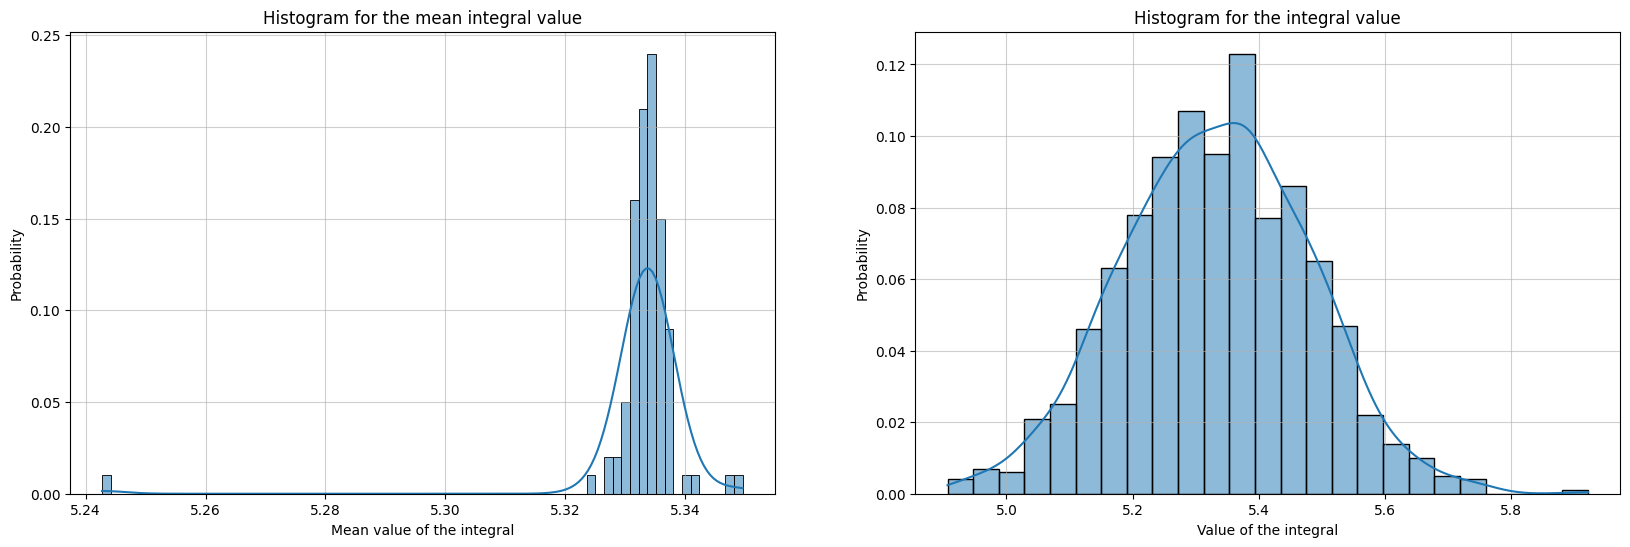

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Distribution of mean integral value
n = np.linspace(10, 10**4, 10**2, dtype=int)
mean = [np.mean([montecarlo(fx, -2, 2, j) for i in range(10**3)]) for j in n] 

# Histogram of possible values of the mean value for n
sns.histplot(mean, kde=True, stat='probability', ax=axes[0])

axes[0].set_xlabel("Mean value of the integral")
axes[0].set_title("Histogram for the mean integral value")
axes[0].grid(alpha=0.6)

# Distribution of the integral value
# Adding the function to the plot
sns.histplot([montecarlo(fx,-2, 2, 10**3) for i in range(10**3)], kde=True, stat='probability', ax=axes[1])
axes[1].set_xlabel("Value of the integral")
axes[1].set_title("Histogram for the integral value")
axes[1].grid(alpha=0.6)

plt.show()

Seen above are the probability distributions of $\left<I(t)\right>$ and $I(t)$ from left to right respectively. While both use $N=10^3$ the former displays the distribution of the mean values of the integral determined for different values of n ranging from 10 to $10^3$ and the latter uses $n=10^3$ and displays the distribution of the values for this specific value of n. Both of these distributions seem to be similar to a Gaussian/normal distribution with the latter fitting this description more. Both remind us of the probabilistic nature of the algorithm and more accurately show the fluctuations around the actual value of the integral. It is also apparent that the most probable outcome is the real value of the integral.